In [9]:
import numpy as np
import torch 

import dataset
import model
import utils

from importlib import reload
reload(utils)

import matplotlib.pyplot as plt
%matplotlib inline

import time

In [2]:
sphereset = dataset.sphere_dataset()

In [26]:
net1 = model.LargeReLU(sphere_dim=500,
                 n_hidden=1000)

### Sanity checks

1. For an arbitrary input, the model should output a number very close to zero, since it's the output of the final linear layer, which should be initialized with mean 0.

In [27]:
#Check for a single input at a time

idx = np.random.randint(0, len(sphereset))
print('Index: {}, Output: {}'.format(idx, net1(sphereset[idx][0])))

Index: 12900742, Output: tensor([-0.0038], grad_fn=<SqueezeBackward3>)


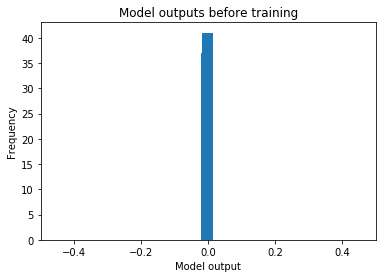

In [28]:
histogram_results = utils.histogram_outputs(net1, 500)
plt.bar(histogram_results[1], histogram_results[0], width = 1./30)
plt.xlabel('Model output')
plt.ylabel('Frequency')
plt.xlim(-0.5,0.5)
plt.title('Model outputs before training');

2. Initially, the accuracy of the model should be a half.

In [20]:
utils.eval_accuracy(net1, n_pts=100)

0.5

## Training time

In [30]:
loss_fun = torch.nn.BCEWithLogitsLoss()

batch_size = 50
dataloader = torch.utils.data.DataLoader(sphereset, 
                                         batch_size=batch_size,
                                         shuffle=False)

optimizer = torch.optim.Adam(net1.parameters(), lr = 0.0001)

net1.train()

losses = np.zeros(1000000)

start_time = time.time()

checkpoint_steps = [10, 500, 1000, 2000, 3000, 4000, 5000, 10000, 100000] 

for i, (points, labels) in enumerate(dataloader):
    
    net1.zero_grad()
    
    output = net1(points)
    
    loss = loss_fun(output, labels.view(-1,1).float())
    loss.backward()
    
    optimizer.step()

    losses[i] = loss.item()
    
    if i in checkpoint_steps:
        torch.save({'iteration': i, 
                    'model_state_dict': net1.state_dict(),
                    'loss': loss.item()}, 'trained_models/largeReLU_{}_{}.pth'.format(1, i))
        
    
    if i > 1000000:
        break
    # should not be necessary, because the dataset only has 50 million images
    
print('Elapsed time: {}'.format(time.time() - start_time))

KeyboardInterrupt: 

In [35]:
torch.save({'iteration': i, 
                    'model_state_dict': net1.state_dict(),
                    'loss': loss.item()}, 'trained_models/largeReLU_{}_{}.pth'.format(1, i))

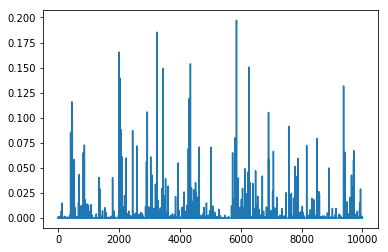

In [34]:
plt.plot(losses[190000:200000])

### More sanity checks

1. Accuracy should be a lot higher than 0.5 now

In [36]:
utils.eval_accuracy(net1, 100000)

0.99991

2. Histogram should reveal two blobs, not one

Text(0.5,1,'Model outputs after training')

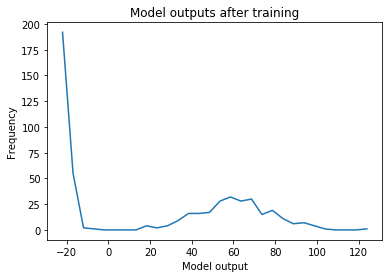

In [37]:
histogram_results = utils.histogram_outputs(net1, 500)
plt.plot(histogram_results[1], histogram_results[0])
plt.xlabel('Model output')
plt.ylabel('Frequency')
plt.title('Model outputs after training')

### Evaluating trained models

Error rates:

After 717766 training steps - 9e-5
After 500 training steps - 3e-3
After 1000 training steps - 3e-3
After 2000 training steps - 1.7e-3


In [43]:
model_to_load = 2000

test_net = model.LargeReLU(sphere_dim=500,
                 n_hidden=1000)

loaded_parms = torch.load('trained_models/largeReLU_{}_{}.pth'.format(1, model_to_load))
test_net.load_state_dict(loaded_parms['model_state_dict'])

In [74]:
start_time = time.time()
print(1 - utils.eval_accuracy(test_net, 100000))
print('Elapsed: {}'.format(time.time() - start_time))

0.0014999999999999458
Elapsed: 66.23716711997986


In [ ]:
start_time = time.time()
print(1 - utils.eval_accuracy_loader(test_net, 200000))
print('Elapsed: {}'.format(time.time() - start_time))

In [97]:
reload(utils)

<module 'utils' from '/run/media/qnl/Seagate Expansion Drive/ML/pytorch-advspheres/utils.py'>